In [ ]:
# 基本分析流程与main一致， 同样需要下载预训练模型， 找bert官方git clone即可

In [1]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("../bert_uncased_L-12_H-768_A-12")
tokenizer

BertTokenizerFast(name_or_path='../bert_uncased_L-12_H-768_A-12', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [2]:
tokenizer("今天天气真好！")

{'input_ids': [101, 100, 1811, 1811, 100, 1921, 100, 1986, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [3]:
tokens = tokenizer.tokenize('我爱中华大地')
print(tokens)
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)
sentence = tokenizer.decode(ids)
print(sentence)

['我', '[UNK]', '中', '[UNK]', '大', '地']
[1855, 100, 1746, 100, 1810, 1802]
我 [UNK] 中 [UNK] 大 地


In [4]:
from safetensors.torch import load_file 
import json
model = load_file("../bert_uncased_L-12_H-768_A-12/model.safetensors")
print(json.dumps(list(model.keys())[:], indent=4))

[
    "bert.embeddings.LayerNorm.beta",
    "bert.embeddings.LayerNorm.gamma",
    "bert.embeddings.position_embeddings.weight",
    "bert.embeddings.token_type_embeddings.weight",
    "bert.embeddings.word_embeddings.weight",
    "bert.encoder.layer.0.attention.output.LayerNorm.beta",
    "bert.encoder.layer.0.attention.output.LayerNorm.gamma",
    "bert.encoder.layer.0.attention.output.dense.bias",
    "bert.encoder.layer.0.attention.output.dense.weight",
    "bert.encoder.layer.0.attention.self.key.bias",
    "bert.encoder.layer.0.attention.self.key.weight",
    "bert.encoder.layer.0.attention.self.query.bias",
    "bert.encoder.layer.0.attention.self.query.weight",
    "bert.encoder.layer.0.attention.self.value.bias",
    "bert.encoder.layer.0.attention.self.value.weight",
    "bert.encoder.layer.0.intermediate.dense.bias",
    "bert.encoder.layer.0.intermediate.dense.weight",
    "bert.encoder.layer.0.output.LayerNorm.beta",
    "bert.encoder.layer.0.output.LayerNorm.gamma",
    "

In [5]:
with open("../bert_uncased_L-12_H-768_A-12/config.json", "r") as f:
    config = json.load(f)
config

{'architectures': ['BertForMaskedLM'],
 'attention_probs_dropout_prob': 0.1,
 'gradient_checkpointing': False,
 'hidden_act': 'gelu',
 'hidden_dropout_prob': 0.1,
 'hidden_size': 768,
 'initializer_range': 0.02,
 'intermediate_size': 3072,
 'layer_norm_eps': 1e-12,
 'max_position_embeddings': 512,
 'model_type': 'bert',
 'num_attention_heads': 12,
 'num_hidden_layers': 12,
 'pad_token_id': 0,
 'position_embedding_type': 'absolute',
 'transformers_version': '4.6.0.dev0',
 'type_vocab_size': 2,
 'use_cache': True,
 'vocab_size': 30522}

In [6]:
import torch
prompt = "the answer to the ultimate question of life, the universe, and everything is "
# print(tokenizer.tokenize(prompt))
# print(tokenizer(prompt))
tokens_dict = tokenizer(prompt)
# print(tokens_dict)
tokens = torch.tensor(tokens_dict['input_ids'])
tokens_type = torch.tensor(tokens_dict['token_type_ids'])
attention_mask = torch.tensor(tokens_dict['attention_mask'])
print(tokens)
print(tokens_type)
print(attention_mask)
prompt_split_as_tokens = [tokenizer.decode([token.item()]) for token in tokens]
print(prompt_split_as_tokens)

tensor([ 101, 1996, 3437, 2000, 1996, 7209, 3160, 1997, 2166, 1010, 1996, 5304,
        1010, 1998, 2673, 2003,  102])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
['[CLS]', 'the', 'answer', 'to', 'the', 'ultimate', 'question', 'of', 'life', ',', 'the', 'universe', ',', 'and', 'everything', 'is', '[SEP]']


In [7]:
word_embedding_layer = torch.nn.Embedding(30522, 768)
word_embedding_layer.weight.data.copy_(model["bert.embeddings.word_embeddings.weight"])
word_embeddings = word_embedding_layer(tokens).to(torch.bfloat16)
word_embeddings.shape

torch.Size([17, 768])

In [9]:
word_embeddings.mean(axis=1)

tensor([ 0.0009, -0.0130, -0.0178, -0.0101, -0.0130, -0.0221, -0.0175, -0.0104,
        -0.0150, -0.0115, -0.0130, -0.0189, -0.0115, -0.0112, -0.0154, -0.0123,
        -0.0002], dtype=torch.bfloat16, grad_fn=<MeanBackward1>)

In [12]:
token_type_embedding_layer = torch.nn.Embedding(2, 768)
token_type_embedding_layer.weight.data.copy_(model["bert.embeddings.token_type_embeddings.weight"])
token_type_embeddings = token_type_embedding_layer(tokens_type).to(torch.bfloat16)
token_type_embeddings.shape

torch.Size([17, 768])

In [10]:
token_position_embedding_layer = torch.nn.Embedding(512, 768)
token_position_embedding_layer.weight.data.copy_(model["bert.embeddings.position_embeddings.weight"])
token_position_embeddings = token_position_embedding_layer(torch.arange(17)).to(torch.bfloat16)
token_position_embeddings.shape

torch.Size([17, 768])

In [11]:
token_position_embeddings.mean(axis=1)

tensor([ 1.5869e-03,  4.7874e-04,  7.3910e-05,  5.7936e-05, -3.0708e-04,
         5.4121e-05, -1.0654e-06, -9.1553e-05, -2.4885e-06, -6.9618e-05,
        -3.5048e-05,  1.6117e-04, -1.2589e-04, -6.1989e-05,  3.5858e-04,
        -3.5286e-04, -2.6321e-04], dtype=torch.bfloat16,
       grad_fn=<MeanBackward1>)

In [13]:
token_embeddings_unnormalized = word_embeddings + token_type_embeddings + token_position_embeddings
token_embeddings_unnormalized.shape

torch.Size([17, 768])

In [14]:
word_embeddings.mean(dim=-1)

tensor([ 0.0009, -0.0130, -0.0178, -0.0101, -0.0130, -0.0221, -0.0175, -0.0104,
        -0.0150, -0.0115, -0.0130, -0.0189, -0.0115, -0.0112, -0.0154, -0.0123,
        -0.0002], dtype=torch.bfloat16, grad_fn=<MeanBackward1>)

In [16]:
token_position_embeddings.mean(dim=-1)

tensor([ 1.5869e-03,  4.7874e-04,  7.3910e-05,  5.7936e-05, -3.0708e-04,
         5.4121e-05, -1.0654e-06, -9.1553e-05, -2.4885e-06, -6.9618e-05,
        -3.5048e-05,  1.6117e-04, -1.2589e-04, -6.1989e-05,  3.5858e-04,
        -3.5286e-04, -2.6321e-04], dtype=torch.bfloat16,
       grad_fn=<MeanBackward1>)

In [11]:
def layer_norm(tensor, norm_eps, norm_weights_gamma, norm_weights_beta):
    return norm_weights_gamma * ((tensor - tensor.mean()) * torch.rsqrt(tensor.var() + norm_eps)) + norm_weights_beta

In [12]:
token_embeddings = layer_norm(token_embeddings_unnormalized, 
                              1e-12, 
                              model["bert.embeddings.LayerNorm.gamma"], 
                              model["bert.embeddings.LayerNorm.beta"])
token_embeddings.shape

torch.Size([17, 768])

In [13]:
q_layer0_weight = model["bert.encoder.layer.0.attention.self.query.weight"]
q_layer0_bias = model["bert.encoder.layer.0.attention.self.query.bias"]
head_dim = q_layer0_weight.shape[0] // 12
q_layer0_weight = q_layer0_weight.view(12, head_dim, 768)
q_layer0_bias = q_layer0_bias.view(12, head_dim)
print(q_layer0_weight.shape,q_layer0_bias.shape)

torch.Size([12, 64, 768]) torch.Size([12, 64])


In [14]:
q_layer0_weight_head0 = q_layer0_weight[0]
q_layer0_bias_head0 = q_layer0_bias[0]
print(q_layer0_weight_head0.shape,q_layer0_bias_head0.shape)

torch.Size([64, 768]) torch.Size([64])


In [15]:
q_per_token = torch.matmul(token_embeddings, q_layer0_weight_head0.T) + q_layer0_bias_head0
q_per_token.shape

torch.Size([17, 64])

In [16]:
k_layer0_weight = model["bert.encoder.layer.0.attention.self.key.weight"]
k_layer0_bias = model["bert.encoder.layer.0.attention.self.key.bias"]
head_dim = k_layer0_weight.shape[0] // 12
k_layer0_weight = k_layer0_weight.view(12, head_dim, 768)
k_layer0_bias = k_layer0_bias.view(12, head_dim)
print(k_layer0_weight.shape,k_layer0_bias.shape)

torch.Size([12, 64, 768]) torch.Size([12, 64])


In [17]:
k_layer0_weight_head0 = k_layer0_weight[0]
k_layer0_bias_head0 = k_layer0_bias[0]
print(k_layer0_weight_head0.shape,k_layer0_bias_head0.shape)

torch.Size([64, 768]) torch.Size([64])


In [18]:
k_per_token = torch.matmul(token_embeddings, k_layer0_weight_head0.T) + k_layer0_bias_head0
k_per_token.shape

torch.Size([17, 64])

In [19]:
v_layer0_weight = model["bert.encoder.layer.0.attention.self.value.weight"]
v_layer0_bias = model["bert.encoder.layer.0.attention.self.value.bias"]
head_dim = v_layer0_weight.shape[0] // 12
v_layer0_weight = v_layer0_weight.view(12, head_dim, 768)
v_layer0_bias = k_layer0_bias.view(12, head_dim)
print(v_layer0_weight.shape,v_layer0_bias.shape)

torch.Size([12, 64, 768]) torch.Size([12, 64])


In [20]:
v_layer0_weight_head0 = v_layer0_weight[0]
v_layer0_bias_head0 = v_layer0_bias[0]
print(v_layer0_weight_head0.shape,v_layer0_bias_head0.shape)

torch.Size([64, 768]) torch.Size([64])


In [21]:
v_per_token = torch.matmul(token_embeddings, v_layer0_weight_head0.T) + v_layer0_bias_head0
v_per_token.shape

torch.Size([17, 64])

In [22]:
qk_per_token = torch.matmul(q_per_token, k_per_token.T)/(head_dim)**0.5
qk_per_token.shape

torch.Size([17, 17])

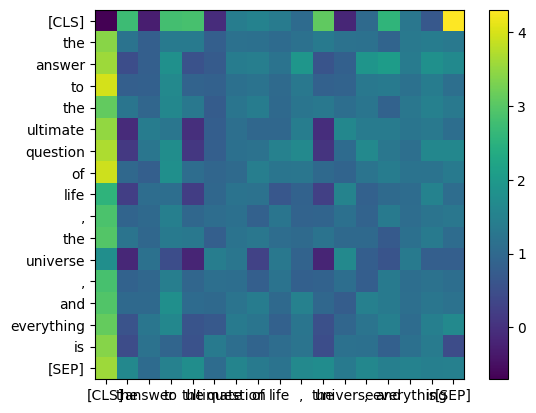

In [23]:
import matplotlib.pyplot as plt
def display_qk_heatmap(qk_per_token):
    _, ax = plt.subplots()
    im = ax.imshow(qk_per_token.to(float).detach(), cmap='viridis')
    ax.set_xticks(range(len(prompt_split_as_tokens)))
    ax.set_yticks(range(len(prompt_split_as_tokens)))
    ax.set_xticklabels(prompt_split_as_tokens)
    ax.set_yticklabels(prompt_split_as_tokens)
    ax.figure.colorbar(im, ax=ax)
    
display_qk_heatmap(qk_per_token)

In [24]:
attention_mask
# have no zero to padding

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

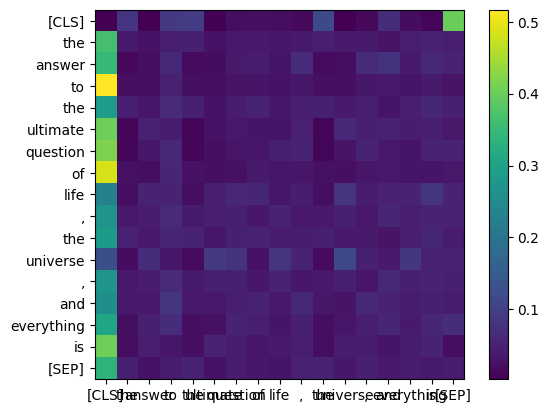

In [25]:
qk_per_token_after_softmax = torch.nn.functional.softmax(qk_per_token, dim=1)
display_qk_heatmap(qk_per_token_after_softmax)

In [26]:
qkv_attention = torch.matmul(qk_per_token_after_softmax, v_per_token)
qkv_attention.shape

torch.Size([17, 64])

In [27]:
qkv_attention_store = []

for head in range(12):
    q_layer0_weight_head = q_layer0_weight[head]
    q_layer0_bias_head = q_layer0_bias[head]
    k_layer0_weight_head = k_layer0_weight[head]
    k_layer0_bias_head = k_layer0_bias[head]
    v_layer0_weight_head = v_layer0_weight[head]
    v_layer0_bias_head = v_layer0_bias[head]
    q_per_token = torch.matmul(token_embeddings, q_layer0_weight_head.T) + q_layer0_bias_head
    k_per_token = torch.matmul(token_embeddings, k_layer0_weight_head.T) + k_layer0_bias_head
    v_per_token = torch.matmul(token_embeddings, v_layer0_weight_head.T) + v_layer0_bias_head

    qk_per_token = torch.matmul(q_per_token, k_per_token.T)/(64)**0.5
    qk_per_token_after_softmax = torch.nn.functional.softmax(qk_per_token, dim=1)
    qkv_attention = torch.matmul(qk_per_token_after_softmax, v_per_token)
    qkv_attention_store.append(qkv_attention)

qkv_attention_store

[tensor([[ 0.0073,  0.0531, -0.0432,  ...,  0.2117, -0.0900,  0.0984],
         [ 1.7806,  0.0900, -0.2794,  ...,  0.1336, -0.1707,  0.2725],
         [ 1.6081,  0.1278, -0.2678,  ...,  0.1634, -0.1177,  0.2535],
         ...,
         [ 1.4299,  0.1399, -0.2410,  ...,  0.1442, -0.0943,  0.2417],
         [ 1.9623,  0.1022, -0.2941,  ...,  0.1248, -0.1527,  0.2808],
         [ 1.6292,  0.1149, -0.2693,  ...,  0.1526, -0.1644,  0.2513]],
        grad_fn=<MmBackward0>),
 tensor([[ 0.6660, -0.0443, -0.3101,  ...,  0.4328,  0.3121,  0.5318],
         [-0.0720,  0.1240,  0.1433,  ..., -0.1158,  0.3254,  0.1322],
         [-0.3852, -0.0540,  0.2774,  ..., -0.2206,  0.3535,  0.1496],
         ...,
         [-0.3392, -0.0247,  0.2304,  ..., -0.1618,  0.2878,  0.1539],
         [-0.3488, -0.0190,  0.2981,  ..., -0.2392,  0.3317,  0.1264],
         [-0.1319,  0.2355,  0.1304,  ..., -0.1552,  0.3497,  0.0536]],
        grad_fn=<MmBackward0>),
 tensor([[ 0.0428, -0.2003, -0.0302,  ..., -0.1929, -0

In [28]:
stacked_qkv_attention = torch.cat(qkv_attention_store, dim=-1)
stacked_qkv_attention.shape

torch.Size([17, 768])

In [29]:
stacked_qkv_attention_output_dense_weight = model["bert.encoder.layer.0.attention.output.dense.weight"]
stacked_qkv_attention_output_dense_bias = model["bert.encoder.layer.0.attention.output.dense.bias"]
print(stacked_qkv_attention_output_dense_weight.shape)

torch.Size([768, 768])


In [30]:
stacked_qkv_attention_output = torch.matmul(stacked_qkv_attention, 
                                            stacked_qkv_attention_output_dense_weight.T) + stacked_qkv_attention_output_dense_bias
stacked_qkv_attention_output.shape

torch.Size([17, 768])

In [38]:
stacked_qkv_attention_output_after_LN = layer_norm(stacked_qkv_attention_output + token_embeddings, 
                              1e-12, 
                              model["bert.encoder.layer.0.attention.output.LayerNorm.gamma"], 
                              model["bert.encoder.layer.0.attention.output.LayerNorm.beta"])
stacked_qkv_attention_output_after_LN.shape

torch.Size([17, 768])

In [39]:
intermediate_dense_weight = model["bert.encoder.layer.0.intermediate.dense.weight"]
intermediate_dense_bias = model["bert.encoder.layer.0.intermediate.dense.bias"]
intermediate_dense_weight.shape

torch.Size([3072, 768])

In [40]:
intermediate_dense_output = torch.matmul(stacked_qkv_attention_output_after_LN, 
                                            intermediate_dense_weight.T) + intermediate_dense_bias
intermediate_dense_output.shape

torch.Size([17, 3072])

In [41]:
layer_output_dense_weight = model["bert.encoder.layer.0.output.dense.weight"]
layer_output_dense_bias = model["bert.encoder.layer.0.output.dense.bias"]
layer_output_dense_weight.shape

torch.Size([768, 3072])

In [42]:
layer_dense_output = torch.matmul(intermediate_dense_output, 
                                  layer_output_dense_weight.T) + layer_output_dense_bias
layer_dense_output.shape

torch.Size([17, 768])

In [43]:
layer_dense_output_after_LN = layer_norm(stacked_qkv_attention_output_after_LN + layer_dense_output, 
                              1e-12, 
                              model["bert.encoder.layer.0.output.LayerNorm.gamma"], 
                              model["bert.encoder.layer.0.output.LayerNorm.beta"])
layer_dense_output_after_LN.shape

torch.Size([17, 768])

In [46]:
final_embeddings = token_embeddings
for layer in range(12):
    qkv_attention_store = []

    q_layer_weight = model[f"bert.encoder.layer.{layer}.attention.self.query.weight"]
    q_layer_bias = model[f"bert.encoder.layer.{layer}.attention.self.query.bias"]
    q_layer_weight = q_layer_weight.view(12, q_layer_weight.shape[0] // 12, 768)
    q_layer_bias = q_layer_bias.view(12, 64)
    
    k_layer_weight = model[f"bert.encoder.layer.{layer}.attention.self.key.weight"]
    k_layer_bias = model[f"bert.encoder.layer.{layer}.attention.self.key.bias"]
    k_layer_weight = k_layer_weight.view(12, k_layer_weight.shape[0] // 12, 768)
    k_layer_bias = k_layer_bias.view(12, 64)
    
    v_layer_weight = model[f"bert.encoder.layer.{layer}.attention.self.value.weight"]
    v_layer_bias = model[f"bert.encoder.layer.{layer}.attention.self.value.bias"]
    v_layer_weight = v_layer_weight.view(12, v_layer_weight.shape[0] // 12, 768)
    v_layer_bias = v_layer_bias.view(12, 64)
    
    stacked_qkv_attention_output_dense_weight = model[f"bert.encoder.layer.{layer}.attention.output.dense.weight"]
    stacked_qkv_attention_output_dense_bias = model[f"bert.encoder.layer.{layer}.attention.output.dense.bias"]
    stacked_qkv_attention_output_LN_gamma = model[f"bert.encoder.layer.{layer}.attention.output.LayerNorm.gamma"]
    stacked_qkv_attention_output_LN_beta = model[f"bert.encoder.layer.{layer}.attention.output.LayerNorm.beta"]
    
    intermediate_dense_weight = model[f"bert.encoder.layer.{layer}.intermediate.dense.weight"]
    intermediate_dense_bias = model[f"bert.encoder.layer.{layer}.intermediate.dense.bias"]
    
    layer_output_dense_weight = model[f"bert.encoder.layer.{layer}.output.dense.weight"]
    layer_output_dense_bias = model[f"bert.encoder.layer.{layer}.output.dense.bias"]
    layer_dense_output_after_LN_gamma = model[f"bert.encoder.layer.{layer}.output.LayerNorm.gamma"]
    layer_dense_output_after_LN_beta = model[f"bert.encoder.layer.{layer}.output.LayerNorm.beta"]
    
    for head in range(12):
        q_layer_weight_head = q_layer_weight[head]
        q_layer_bias_head = q_layer_bias[head]
        k_layer_weight_head = k_layer_weight[head]
        k_layer_bias_head = k_layer_bias[head]
        v_layer_weight_head = v_layer_weight[head]
        v_layer_bias_head = v_layer_bias[head]
        q_per_token = torch.matmul(final_embeddings, q_layer_weight_head.T) + q_layer_bias_head
        k_per_token = torch.matmul(final_embeddings, k_layer_weight_head.T) + k_layer_bias_head
        v_per_token = torch.matmul(final_embeddings, v_layer_weight_head.T) + v_layer_bias_head

        qk_per_token = torch.matmul(q_per_token, k_per_token.T)/(64)**0.5
        qk_per_token_after_softmax = torch.nn.functional.softmax(qk_per_token, dim=1)
        qkv_attention = torch.matmul(qk_per_token_after_softmax, v_per_token)
        qkv_attention_store.append(qkv_attention)

    stacked_qkv_attention = torch.cat(qkv_attention_store, dim=-1)
    stacked_qkv_attention_output = torch.matmul(stacked_qkv_attention, 
                                            stacked_qkv_attention_output_dense_weight.T) + stacked_qkv_attention_output_dense_bias
    stacked_qkv_attention_output_after_LN = layer_norm(stacked_qkv_attention_output + final_embeddings, 
                              1e-12, 
                              stacked_qkv_attention_output_LN_gamma, 
                              stacked_qkv_attention_output_LN_beta)
    intermediate_dense_output = torch.matmul(stacked_qkv_attention_output_after_LN, 
                                            intermediate_dense_weight.T) + intermediate_dense_bias
    layer_dense_output = torch.matmul(intermediate_dense_output, 
                                  layer_output_dense_weight.T) + layer_output_dense_bias
    layer_dense_output_after_LN = layer_norm(stacked_qkv_attention_output_after_LN + layer_dense_output, 
                              1e-12, 
                              layer_dense_output_after_LN_gamma, 
                              layer_dense_output_after_LN_beta)
    final_embeddings = layer_dense_output_after_LN
    
final_embeddings.shape

torch.Size([17, 768])

In [47]:
bert_pooler_weight = model["bert.pooler.dense.weight"]
bert_pooler_bias = model["bert.pooler.dense.bias"]
bert_pooler_weight.shape

torch.Size([768, 768])

In [52]:
final_embeddings_after_pooler = torch.matmul(final_embeddings, bert_pooler_weight.T) + bert_pooler_bias
final_embeddings_after_pooler.shape

torch.Size([17, 768])

In [51]:
transform_dense_weight = model["cls.predictions.transform.dense.weight"]
transform_dense_bias = model["cls.predictions.transform.dense.bias"]
transform_LN_gamma = model["cls.predictions.transform.LayerNorm.gamma"]
transform_LN_beta = model["cls.predictions.transform.LayerNorm.beta"]
print(transform_dense_weight.shape, transform_LN_gamma.shape)

torch.Size([768, 768]) torch.Size([768])


In [53]:
final_embedding_after_pooler_dense = torch.matmul(final_embeddings_after_pooler, 
                                                  transform_dense_weight.T) + transform_dense_bias
final_embedding_after_pooler_dense.shape

torch.Size([17, 768])

In [54]:
final_embedding_after_pooler_dense_LN = layer_norm(final_embedding_after_pooler_dense + final_embeddings,
                                                   1e-12, 
                                                   transform_LN_gamma,
                                                   transform_LN_beta)
final_embedding_after_pooler_dense_LN.shape

torch.Size([17, 768])

In [56]:
logits = final_embedding_after_pooler_dense_LN.reshape(-1)
logits.shape

torch.Size([13056])

In [31]:
print(json.dumps(list(model.keys())[:], indent=4))

[
    "bert.embeddings.LayerNorm.beta",
    "bert.embeddings.LayerNorm.gamma",
    "bert.embeddings.position_embeddings.weight",
    "bert.embeddings.token_type_embeddings.weight",
    "bert.embeddings.word_embeddings.weight",
    "bert.encoder.layer.0.attention.output.LayerNorm.beta",
    "bert.encoder.layer.0.attention.output.LayerNorm.gamma",
    "bert.encoder.layer.0.attention.output.dense.bias",
    "bert.encoder.layer.0.attention.output.dense.weight",
    "bert.encoder.layer.0.attention.self.key.bias",
    "bert.encoder.layer.0.attention.self.key.weight",
    "bert.encoder.layer.0.attention.self.query.bias",
    "bert.encoder.layer.0.attention.self.query.weight",
    "bert.encoder.layer.0.attention.self.value.bias",
    "bert.encoder.layer.0.attention.self.value.weight",
    "bert.encoder.layer.0.intermediate.dense.bias",
    "bert.encoder.layer.0.intermediate.dense.weight",
    "bert.encoder.layer.0.output.LayerNorm.beta",
    "bert.encoder.layer.0.output.LayerNorm.gamma",
    "